In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Learning rate

In [2]:
def load_learning(folder, results=30):
    resultados = pd.DataFrame()
    
    for i in range(results):
        resultado = pd.read_csv('results/{}/learning_{}.csv'.format(folder, i), index_col=0)
        resultados[i] = resultado['pseudo-likelihood']

    return resultados

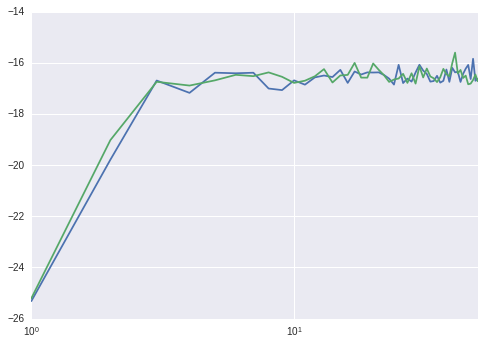

In [3]:
resultados = load_learning('3-3/50', 30)
plot = resultados.mean(axis=1).plot()
plot.set_xscale('log')

resultados = load_learning('4-2/50', 30)
plot = resultados.mean(axis=1).plot()
plot.set_xscale('log')

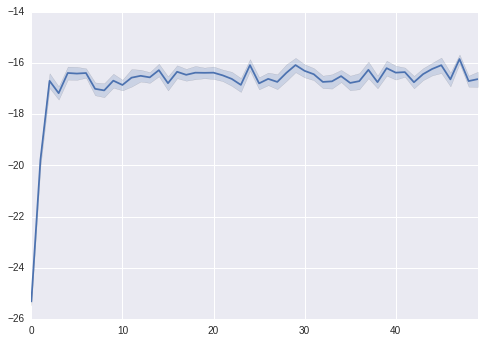

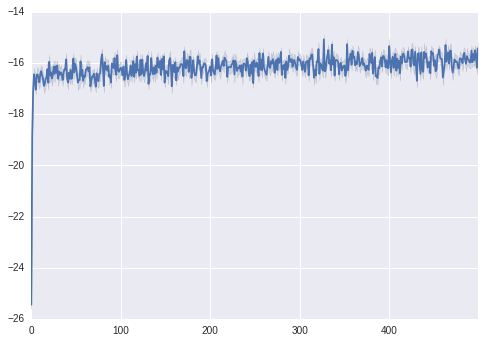

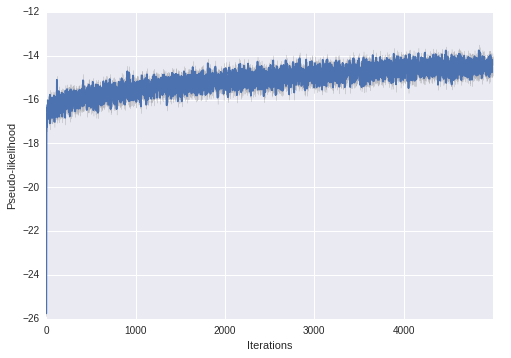

In [4]:
def plot_learning_rate(resultados, title='', x_label='', y_label=''):
    #http://seaborn.pydata.org/generated/seaborn.tsplot.html
    ax = sns.tsplot(data=resultados.T.values)#, err_style="boot_traces")

    #mean = resultados.T.mean()
    #std  = resultados.T.std()
    #ax.errorbar(resultados.index-1, mean, yerr=std)

    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    plt.show()

#%config InlineBackend.figure_format = 'png'
plot_learning_rate(load_learning('3-3/50', 30))
plot_learning_rate(load_learning('3-3/500', 30))
#%config InlineBackend.figure_format = 'pdf'
plot_learning_rate(load_learning('3-3/5000', 30), y_label='Pseudo-likelihood', x_label='Iterations')
#%config InlineBackend.figure_format = 'png'

## Results

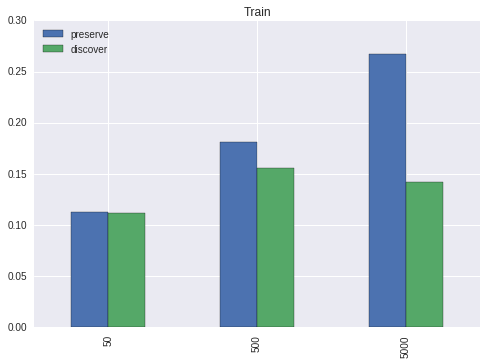

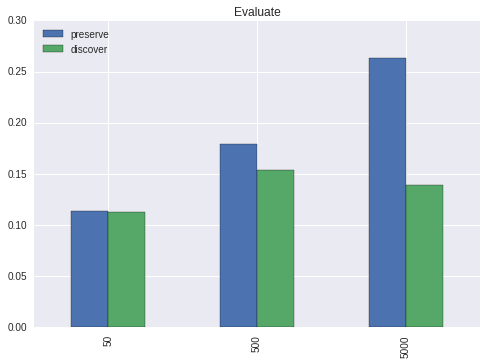

In [53]:
def load_results(folder, file='train', results=30):
    loaded = pd.DataFrame(columns=('preserve', 'discover', 'total'))
    
    read_file = lambda folder, i: pd.read_csv('results/{}/result_{}_{}.csv'.format(folder, file, i), index_col=0)
    return pd.concat([read_file(folder, i) for i in range(results)])

def plot_results_bar(database, file, title):
    results = pd.DataFrame(columns=('preserve', 'discover'))
    results.loc[50] = load_results('{}/50'.format(database), file, 30).mean()
    results.loc[500] = load_results('{}/500'.format(database), file, 30).mean()
    results.loc[5000] = load_results('{}/5000'.format(database), file, 30).mean()
    
    '''
    error = pd.DataFrame(columns=('preserve', 'discover'))
    error.loc[50] = load_results('{}/50'.format(database), file, 30).std()
    error.loc[500] = load_results('{}/500'.format(database), file, 30).std()
    error.loc[5000] = load_results('{}/5000'.format(database), file, 30).std()

    index = np.arange(len(results.index))
    width = .45
    fig, ax = plt.subplots()
    barras_preserve = ax.bar(index, results.preserve, width=width, yerr=error.preserve/10, ecolor='red')
    barras_discover = ax.bar(index+width, results.discover, width=width, color='#55a868', yerr=error.discover/10, ecolor='r')
    
    #ax.errorbar([1,2,3], results.preserve, yerr=[1,2,3], fmt='o', capthick=2)
    
    ax.set_xticks(index + width)
    ax.set_xticklabels(results.index)
    '''

    ax = results.plot.bar(title=title)
    return ax

plot_results_bar('3-3', 'train', 'Train')
plot_results_bar('3-3', 'test', 'Evaluate')
#plot_results_bar('4-2', 'train')
#plot_results_bar('4-2', 'test')

In [61]:
plot = pd.read_csv('results/learn/learning_50000.csv', index_col=0).plot()
#plot.set_xscale('log')